# Welcome to an example Binder

We need `seaborn`, which shall be included it in `requirements.txt` file

Evualuacion de covid en la poblacion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlp
import matplotlib as plt
import seaborn as sns

In [2]:
%ls

 07_02_pie_box_scatter_bubble.ipynb   requierementsEXL
 Canada.xlsx                          requirements.txt
 datasets/                            reto.csv
'Datos .xlsx'                         runtime.txt
 nhanes_2015_2016.csv                 session_01/
 README.md                            welcome_binder.ipynb


In [3]:
df = pd.read_csv('reto.csv')
df

Unnamed: 0      country iso_code      date  total_vaccinations  \
0               0  Afghanistan      AFG  11/05/21              504502   
1               1  Afghanistan      AFG  20/05/21              547901   
2               2  Afghanistan      AFG  24/05/21              573277   
3               3  Afghanistan      AFG  26/05/21              590454   
4               4  Afghanistan      AFG  27/05/21              593313   
...           ...          ...      ...       ...                 ...   
19252       19252     Zimbabwe      ZWE  21/09/21             5084031   
19253       19253     Zimbabwe      ZWE  22/09/21             5123522   
19254       19254     Zimbabwe      ZWE  23/09/21             5166508   
19255       19255     Zimbabwe      ZWE  24/09/21             5197363   
19256       19256     Zimbabwe      ZWE  25/09/21             5218672   

       people_vaccinated  people_fully_vaccinated  New_deaths  population  \
0                 448878                    55624          12    40064421   
1                 470341                    77560          10    40064421   
2                 476367                    96910          10    40064421   
3                 479372                   111082          19    40064421   
4                 479574                   113739          14    40064421   
...                  ...                      ...         ...         ...   
19252            2976212                  2107819           2    15150655   
19253            2992048                  2131474           0    15150655   
19254            3007945                  2158563          23    15150655   
19255            3021593                  2175770           8    15150655   
19256            3030042                  2188630           0    15150655   

           ratio  
0       1.120391  
1       1.173962  
2       1.189003  
3       1.196503  
4       1.197007  
...          ...  
19252  19.644114  
19253  19.748638  
19254  19.853564  
19255  19.943646  
19256  19.999413  

[19257 rows x 10 columns]

En esta base de datos se encuentra el numero de personas que ya cuentan con las vacunas completadas, esta sera mi variable de interes a pronosticar y se comparara con las diferentes variables

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19257 entries, 0 to 19256
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               19257 non-null  int64  
 1   country                  19257 non-null  object 
 2   iso_code                 19257 non-null  object 
 3   date                     19257 non-null  object 
 4   total_vaccinations       19257 non-null  int64  
 5   people_vaccinated        19257 non-null  int64  
 6   people_fully_vaccinated  19257 non-null  int64  
 7   New_deaths               19257 non-null  int64  
 8   population               19257 non-null  int64  
 9   ratio                    19257 non-null  float64
dtypes: float64(1), int64(6), object(3)
memory usage: 1.5+ MB


Aqui podemos ver que se encuentran 9 variables en la base de datos y se tienen diferentes tipos de datos, object , integer y float

In [5]:
df.head()

Unnamed: 0      country iso_code      date  total_vaccinations  \
0           0  Afghanistan      AFG  11/05/21              504502   
1           1  Afghanistan      AFG  20/05/21              547901   
2           2  Afghanistan      AFG  24/05/21              573277   
3           3  Afghanistan      AFG  26/05/21              590454   
4           4  Afghanistan      AFG  27/05/21              593313   

   people_vaccinated  people_fully_vaccinated  New_deaths  population  \
0             448878                    55624          12    40064421   
1             470341                    77560          10    40064421   
2             476367                    96910          10    40064421   
3             479372                   111082          19    40064421   
4             479574                   113739          14    40064421   

      ratio  
0  1.120391  
1  1.173962  
2  1.189003  
3  1.196503  
4  1.197007

In [6]:
df.describe()

Unnamed: 0  total_vaccinations  people_vaccinated  \
count  19257.000000        1.925700e+04       1.925700e+04   
mean    9628.000000        1.657053e+07       1.072298e+07   
std     5559.161403        5.887682e+07       3.918869e+07   
min        0.000000        1.630000e+02       1.620000e+02   
25%     4814.000000        3.811710e+05       2.817130e+05   
50%     9628.000000        2.108172e+06       1.382831e+06   
75%    14442.000000        9.987918e+06       5.760947e+06   
max    19256.000000        2.174043e+09       1.100842e+09   

       people_fully_vaccinated    New_deaths    population         ratio  
count             1.925700e+04  19257.000000  1.925700e+04  19257.000000  
mean              5.987480e+06    110.592927  4.823571e+07     28.595815  
std               2.167499e+07    357.610074  1.553499e+08     24.389301  
min               1.000000e+00    -41.000000  1.619000e+03      0.002980  
25%               8.647700e+04      1.000000  2.871560e+06      6.685156  
50%               6.586820e+05      9.000000  1.016042e+07     22.252118  
75%               3.632394e+06     60.000000  3.815000e+07     47.862965  
max               1.022207e+09   8786.000000  1.445426e+09    118.321562

In [7]:
df.columns

Index(['Unnamed: 0', 'country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'New_deaths',
       'population', 'ratio'],
      dtype='object')

In [8]:
df.tail()

Unnamed: 0   country iso_code      date  total_vaccinations  \
19252       19252  Zimbabwe      ZWE  21/09/21             5084031   
19253       19253  Zimbabwe      ZWE  22/09/21             5123522   
19254       19254  Zimbabwe      ZWE  23/09/21             5166508   
19255       19255  Zimbabwe      ZWE  24/09/21             5197363   
19256       19256  Zimbabwe      ZWE  25/09/21             5218672   

       people_vaccinated  people_fully_vaccinated  New_deaths  population  \
19252            2976212                  2107819           2    15150655   
19253            2992048                  2131474           0    15150655   
19254            3007945                  2158563          23    15150655   
19255            3021593                  2175770           8    15150655   
19256            3030042                  2188630           0    15150655   

           ratio  
19252  19.644114  
19253  19.748638  
19254  19.853564  
19255  19.943646  
19256  19.999413

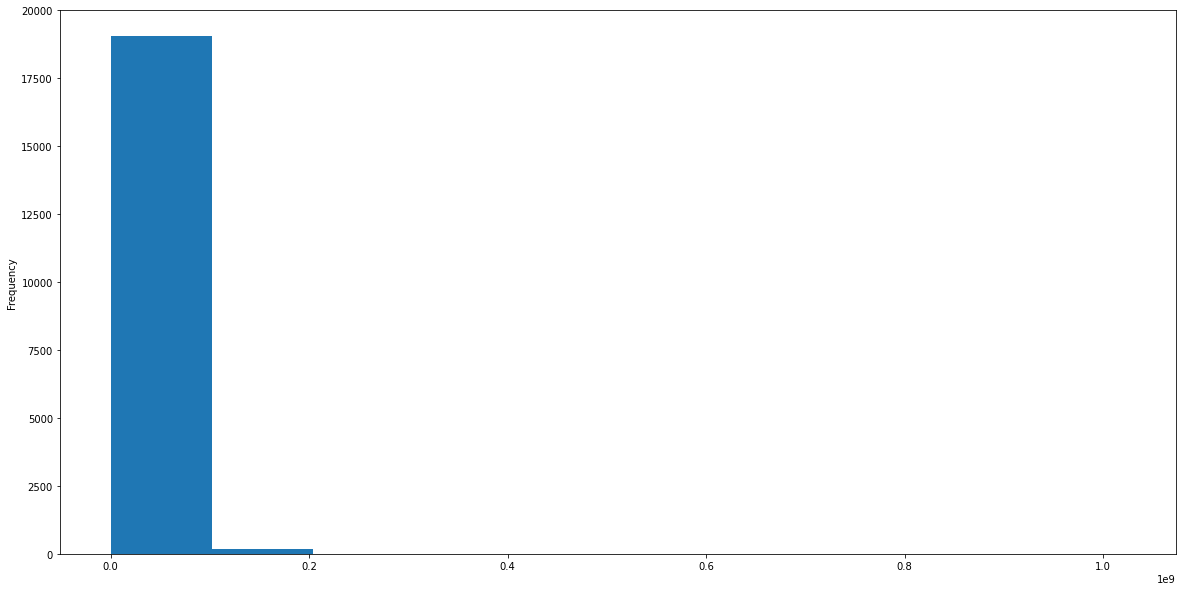

In [10]:
df['people_fully_vaccinated'].plot(kind='hist',
                                  figsize=(20,10))

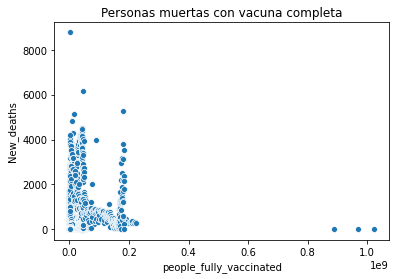

In [11]:
sns.scatterplot(x='people_fully_vaccinated',y='New_deaths',data=df)
mlp.title('Personas muertas con vacuna completa')
mlp.show()

In [13]:
pd.pivot_table(df,index='country',
              values='people_fully_vaccinated',
              aggfunc = ['sum'])

sum
                                                   people_fully_vaccinated
country                                                                   
Afghanistan                                                        2799706
Albania                                                           48297331
Algeria                                                            7899435
Andorra                                                             297454
Angola                                                            11844667
...                                                                    ...
Wallis and Futuna                                                    80242
Yemen                                                                36808
Zambia                                                             7567355
Zimbabwe                                                         113126143
occupied Palestinian territory, including east ...                44286761

[198 rows x 1 columns]

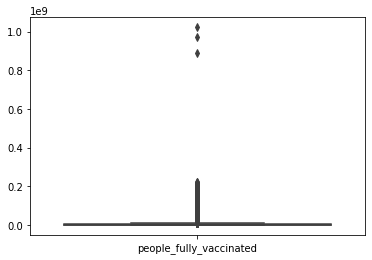

In [14]:
sns.boxplot(data=df.loc[:,['people_fully_vaccinated']])

In [16]:
df.head()

Unnamed: 0      country iso_code      date  total_vaccinations  \
0           0  Afghanistan      AFG  11/05/21              504502   
1           1  Afghanistan      AFG  20/05/21              547901   
2           2  Afghanistan      AFG  24/05/21              573277   
3           3  Afghanistan      AFG  26/05/21              590454   
4           4  Afghanistan      AFG  27/05/21              593313   

   people_vaccinated  people_fully_vaccinated  New_deaths  population  \
0             448878                    55624          12    40064421   
1             470341                    77560          10    40064421   
2             476367                    96910          10    40064421   
3             479372                   111082          19    40064421   
4             479574                   113739          14    40064421   

      ratio  
0  1.120391  
1  1.173962  
2  1.189003  
3  1.196503  
4  1.197007